In [516]:
import time
from datetime import datetime

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

In [517]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [518]:
# load file to the pandas
filepath = 'Sheet_1_data_rateby-maleandfemale-education.csv'

df = pd.read_csv(filepath)
print("done")


done


In [519]:
# identify variables,which means education values from males and females
data_list_n = {
    'High school or less':0 , 'Some college':0, "Associate's degree":0, "Bachelor's degree or higher":0
}
data_list_v = {
    'High school or less':0 , 'Some college':0, "Associate's degree":0, "Bachelor's degree or higher":0
}


# na menas list of gender,pl means list of percentage,z means all percentage,xeu means education list,labels means list of education by different gender
na = df['Gender'].values.tolist()
pl = df['Percent unemployed'].values.tolist()
z = 0
for i in pl:
    z+=i

xeu = df['Educational attainment'].values.tolist()
labels = df['Educational attainment'].drop_duplicates().values.tolist()

labels

['High school or less',
 'Some college',
 "Associate's degree",
 "Bachelor's degree or higher"]

In [520]:
#  calculate percentage of different sex and education. keep it to the difnation
for i,j in enumerate(xeu):
    if na[i] == 'Female':
        data_list_v[j]+=pl[i]
    else:
        data_list_n[j]+=pl[i]
for key,value in data_list_v.items():
       data_list_v[key]= float("%.2f" % ((value/z)*100))
for key,value in data_list_n.items():
       data_list_n[key]= float("%.2f" % ((value/z)*100))

In [521]:
data_list_v

{'High school or less': 17.34,
 'Some college': 15.37,
 "Associate's degree": 11.66,
 "Bachelor's degree or higher": 8.1}

In [522]:
data_list_n

{'High school or less': 15.73,
 'Some college': 13.71,
 "Associate's degree": 10.8,
 "Bachelor's degree or higher": 7.29}

In [523]:
plt.figure(figsize=(18, 10))
# build calibration label and data of x

first = [x for x in data_list_n.values()]
second = [x for x in data_list_v.values()]

<Figure size 1296x720 with 0 Axes>

In [524]:
first

[15.73, 13.71, 10.8, 7.29]

In [525]:
second

[17.34, 15.37, 11.66, 8.1]

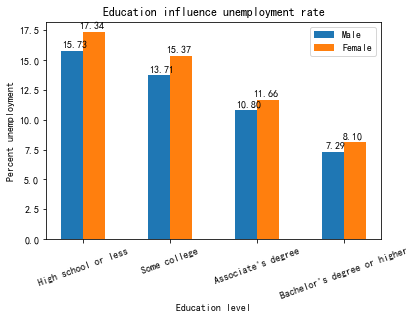

In [526]:
# Do basic chart building

x = np.arange(len(labels))  # X axis scale label position
width = 0.25  # Width of column
# Calculate the position of each column on the X-axis, ensuring that the X-axis scale label is centered
# x - width/2，x + width/2The position of each set of data on the X-axis
plt.bar(x - width/2, first, width, label='Male')
plt.bar(x + width/2, second, width, label='Female')


# Optimize the display of charts

plt.ylabel('Percent unemployment')
plt.title('Education influence unemployment rate')
# The axis scale label position is not calculated

for X,y in zip(x,first):
    plt.text(X-0.1,y+0.2,'%.2f' %y, ha='center',va='bottom')

for X, y in zip(x, second):
    plt.text(X+0.1,y+0.2,'%.2f'%y, ha='center',va='bottom')
plt.legend(loc='upper right')
plt.xticks(x, labels=labels,rotation=20)
plt.xlabel('Education level')

plt.show()


图二

In [527]:
filepath = ("1978-2017-australiansdg-indicator-8-5-2a-females.csv")

female = pd.read_csv(filepath)
print("done")

done


In [528]:
female.head()

,Month,Females 15-24 unemployment rate (%),Females 25-34 unemployment rate (%),Females 35-44 unemployment rate (%),Females 45-54 unemployment rate (%),Females 55-64 unemployment rate (%),Females 65 and over unemployment rate (%),Females 15 and over unemployment rate (%),Females 15-64 unemployment rate (%)
0,Dec-78,15.5,5.3,4.4,3.6,2.0,-,8.1,8.2
1,Dec-79,14.0,6.7,4.3,3.5,2.7,1,8.1,8.2
2,Dec-80,13.8,6.4,3.7,3.5,2.9,1,8.0,8.0
3,Dec-81,13.0,5.9,4.7,3.4,2.2,1.8,7.6,7.7
4,Dec-82,17.1,7.8,6.1,4.7,2.8,0.8,10.1,10.2


In [529]:
def make_time(s):
    try:
        return datetime.strptime(s, "%b-%y")
    except Exception as e:
        return s
female["Year"] = female.Month.apply(make_time)
female.Year.head()

0   1978-12-01
1   1979-12-01
2   1980-12-01
3   1981-12-01
4   1982-12-01
Name: Year, dtype: datetime64[ns]

In [530]:
female = female.set_index("Year")

label为标注,已经进行了字体的转换,可以输入英文或者汉字了
↓

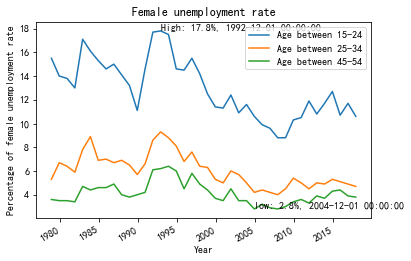

In [531]:


female['Females 15-24 unemployment rate (%)'].plot(label="Age between 15-24")
female['Females 25-34 unemployment rate (%)'].plot(label="Age between 25-34")
female['Females 45-54 unemployment rate (%)'].plot(label="Age between 45-54")


i_max = female['Females 15-24 unemployment rate (%)'].idxmax()
high = female.loc[i_max]['Females 15-24 unemployment rate (%)']
plt.annotate(f"High: {high}%, {i_max}", (i_max, high))



i_min = female['Females 45-54 unemployment rate (%)'].idxmin()
low = female.loc[i_min]['Females 45-54 unemployment rate (%)']
plt.annotate(f"low: {low}%, {i_min}", (i_min, low))

plt.ylabel('Percentage of female unemployment rate')
plt.title('Female unemployment rate')
plt.legend(loc='upper right')
plt.show()

图三

In [532]:
file = 'Monthly hours worked in all jobs, Seasonally adjusted.csv'
df  = pd.read_csv(file,delimiter=',',header=1,nrows=121)

In [533]:
df

,Unnamed: 0,Hours worked (m),Yearly change (%)
0,Jun-11,"1,581",1.8
1,Jul-11,"1,582",2.2
2,Aug-11,"1,584",1.3
3,Sep-11,"1,581",1.2
4,Oct-11,"1,592",1.5
...,...,...,...
116,Feb-21,"1,763",-0.4
117,Mar-21,"1,802",2.2
118,Apr-21,"1,789",12.3
119,May-21,"1,814",13.0


In [534]:
# output data from csv and turn it to the list
X = df['Unnamed: 0'].values.tolist()
y1 = df['Hours worked (m)'].values.tolist()
y2 = df['Yearly change (%)'].values.tolist()

In [535]:
Y1 = []
for i in y1:
    Y1.append(int(i.replace(',','')))

In [536]:
y2

[1.8,
 2.2,
 1.3,
 1.2,
 1.5,
 0.9,
 1.2,
 0.5,
 0.4,
 0.8,
 2.8,
 2.0,
 -0.2,
 0.4,
 0.2,
 1.1,
 -0.4,
 0.9,
 0.8,
 0.7,
 1.1,
 0.1,
 0.9,
 0.0,
 1.7,
 1.7,
 2.0,
 0.6,
 1.3,
 0.2,
 0.1,
 -0.2,
 0.2,
 1.0,
 -0.7,
 0.3,
 0.7,
 0.0,
 -0.2,
 0.2,
 0.2,
 0.5,
 -0.1,
 2.0,
 1.3,
 1.4,
 2.4,
 1.6,
 1.0,
 1.5,
 1.4,
 2.3,
 2.8,
 2.6,
 3.2,
 2.0,
 2.2,
 1.4,
 -0.3,
 1.7,
 1.5,
 1.3,
 1.6,
 0.7,
 0.7,
 0.8,
 1.4,
 2.0,
 -0.1,
 1.4,
 2.0,
 2.9,
 3.0,
 2.2,
 2.4,
 3.1,
 3.0,
 3.6,
 2.8,
 0.3,
 3.6,
 2.6,
 4.8,
 1.1,
 2.0,
 2.5,
 2.2,
 2.1,
 2.3,
 1.3,
 1.5,
 3.5,
 2.4,
 2.9,
 1.5,
 2.1,
 1.6,
 1.6,
 1.9,
 1.8,
 1.1,
 1.3,
 2.0,
 0.7,
 0.4,
 -0.7,
 -10.2,
 -9.1,
 -5.7,
 -5.0,
 -5.0,
 -5.0,
 -2.4,
 -1.0,
 -1.6,
 -5.9,
 -0.4,
 2.2,
 12.3,
 13.0,
 6.8]

In [537]:
# Set font and symbol display
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

[Text(0, 0, 'Jun-11'),
 Text(3, 0, 'Sep-11'),
 Text(6, 0, 'Dec-11'),
 Text(9, 0, 'Mar-12'),
 Text(12, 0, 'Jun-12'),
 Text(15, 0, 'Sep-12'),
 Text(18, 0, 'Dec-12'),
 Text(21, 0, 'Mar-13'),
 Text(24, 0, 'Jun-13'),
 Text(27, 0, 'Sep-13'),
 Text(30, 0, 'Dec-13'),
 Text(33, 0, 'Mar-14'),
 Text(36, 0, 'Jun-14'),
 Text(39, 0, 'Sep-14'),
 Text(42, 0, 'Dec-14'),
 Text(45, 0, 'Mar-15'),
 Text(48, 0, 'Jun-15'),
 Text(51, 0, 'Sep-15'),
 Text(54, 0, 'Dec-15'),
 Text(57, 0, 'Mar-16'),
 Text(60, 0, 'Jun-16'),
 Text(63, 0, 'Sep-16'),
 Text(66, 0, 'Dec-16'),
 Text(69, 0, 'Mar-17'),
 Text(72, 0, 'Jun-17'),
 Text(75, 0, 'Sep-17'),
 Text(78, 0, 'Dec-17'),
 Text(81, 0, 'Mar-18'),
 Text(84, 0, 'Jun-18'),
 Text(87, 0, 'Sep-18'),
 Text(90, 0, 'Dec-18'),
 Text(93, 0, 'Mar-19'),
 Text(96, 0, 'Jun-19'),
 Text(99, 0, 'Sep-19'),
 Text(102, 0, 'Dec-19'),
 Text(105, 0, 'Mar-20'),
 Text(108, 0, 'Jun-20'),
 Text(111, 0, 'Sep-20'),
 Text(114, 0, 'Dec-20'),
 Text(117, 0, 'Mar-21'),
 Text(120, 0, 'Jun-21')]

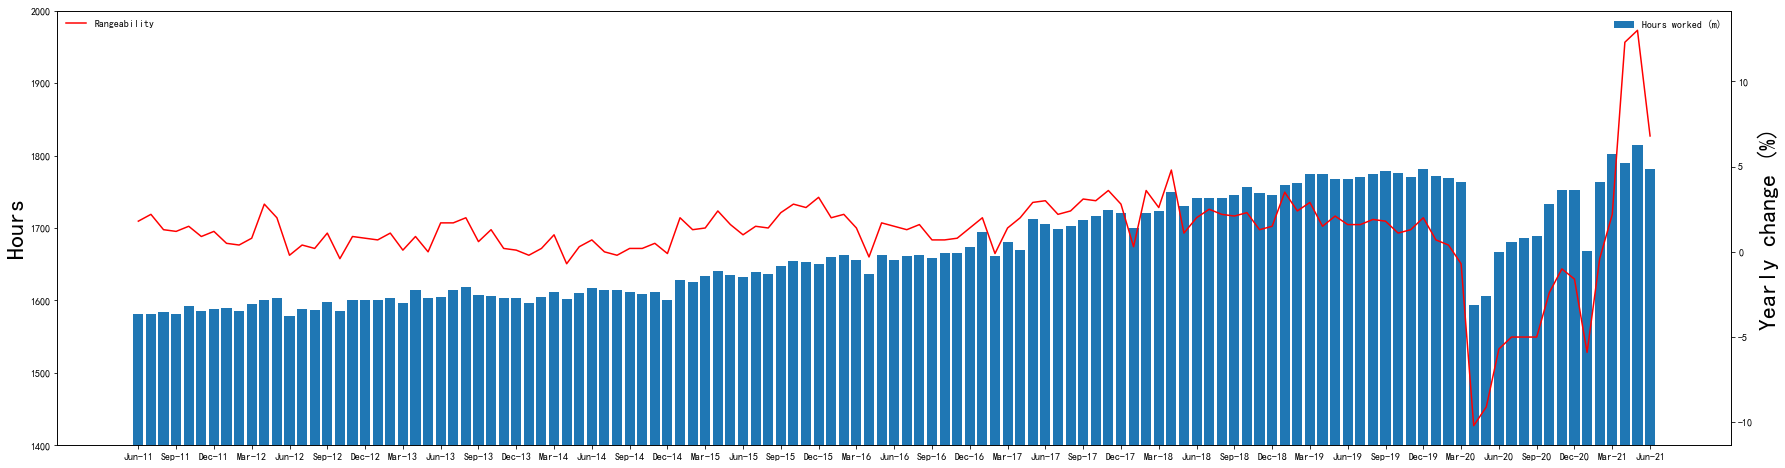

In [538]:
# Set size of table
fig = plt.figure(figsize=(30,8))
ax1 = fig.add_subplot(111)
lns1 = ax1.bar(X,Y1,label='Hours worked (m)')
ax1.set_ylabel('Hours',fontsize=24)
# Set the histogram Y-axis interval
ax1.set_ylim(1400,2000)
# creaat a new backgrround
ax2 = ax1.twinx()
# input line chart values and line color styles and legends
lns2 = ax2.plot(X, y2, 'r-', label= "Rangeability")
# Set the Y-axis name and font size of the line chart
ax2.set_ylabel('Yearly change (%)',fontsize=24)

ax1.legend(loc='best',frameon=False)  # set position of legend
ax2.legend(loc='best',frameon=False)
# The jump shows the X-axis(if too many numbers in x, it avoid congestion between each data)
plt.xticks(range(0,121,3))
ax2.set_xticklabels(X[::3])

graph 4

In [539]:
file = 'RM3.xlsx'
df  = pd.read_excel(file,header=3)

In [540]:
df

,Month,Duration of job search,Greater capital city and rest of state (GCCSA): ASGS (2011),Labour market region (SA4): ASGS (2011),Unemployed total ('000),Number of weeks searching for job ('000 Weeks),Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,1991-07-01,Under 13 weeks (under 3 months),Greater Sydney,NC Not collected [1960-1998],57.576690,252.449356,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1991-07-01,Under 13 weeks (under 3 months),Rest of NSW,NC Not collected [1960-1998],35.821510,169.988454,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1991-07-01,Under 13 weeks (under 3 months),Greater Melbourne,NC Not collected [1960-1998],57.782074,273.030760,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1991-07-01,Under 13 weeks (under 3 months),Rest of Vic.,NC Not collected [1960-1998],15.820991,78.374796,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1991-07-01,Under 13 weeks (under 3 months),Greater Brisbane,NC Not collected [1960-1998],27.787926,127.779190,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71493,2021-06-01,52 weeks and over (12 months and over),Rest of Tas.,603 Tasmania - South East,0.299243,27.400021,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71494,2021-06-01,52 weeks and over (12 months and over),Rest of Tas.,604 Tasmania - West and North West,0.824445,241.850698,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71495,2021-06-01,52 weeks and over (12 months and over),Northern Territory,701 Darwin,1.229002,181.270371,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71496,2021-06-01,52 weeks and over (12 months and over),Northern Territory,702 Northern Territory - Outback,1.534802,265.246263,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [541]:
# take data out of csv and turn to list
year = df['Month'].values.tolist()
y = df['Duration of job search'].values.tolist()
data = df["Number of weeks searching for job ('000 Weeks)"].values.tolist()

In [542]:
lists = []
for i in year:
    timeArray = time.localtime(int(str(i)[:9]))
    otherStyleTime = time.strftime("%Y--%m--%d %H:%M:%S", timeArray)
    lists.append(otherStyleTime[:4])


In [543]:
#save data to dict
dicts = {


}
for i,j in enumerate(lists):
    try:
        dicts[j][y[i]]+=float(data[i])*1000

    except:
        try:
            if dicts[j]:
                dicts[j][y[i]] =float(data[i])*1000
        except:
            dicts[j] = {}
            dicts[j][y[i]] =float(data[i])*1000


In [544]:
yearsa = dicts.keys()
years = []
Under = []
weeks_13 = []
weeks_52 = []
for i in yearsa:
    years.append(i)

In [545]:
for i in dicts.values():
    Under.append(i['Under 13 weeks (under 3 months)'])
    weeks_13.append(i['13 weeks and under 52 weeks (3-12 months)'])
    weeks_52.append(i['52 weeks and over (12 months and over)'])

In [546]:
tick_step=1
group_gap=0.2
bar_gap=0
datas = [Under,weeks_13,weeks_52]
name = ['Under 13 weeks (under 3 months)','13 weeks and under 52 weeks (3-12 months)','52 weeks and over (12 months and over)']

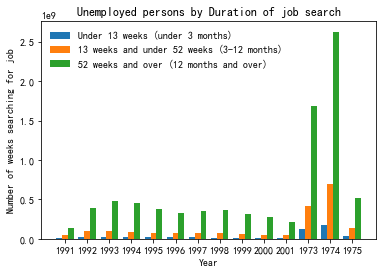

In [547]:
x = np.arange(len(years)) * tick_step
#  group_num is number of group data（amount of colume）
group_num = len(datas)
# group_width is width of colume，group_gap is distancce of gap between colume
group_width = tick_step - group_gap
# bar_span is gap between each colume groups in x-axis, it's sum of width and gap
bar_span = group_width / group_num
# bar_width is actural width of colume
bar_width = bar_span - bar_gap
# built columns
for index, y in enumerate(datas):
    plt.bar(x + index*bar_span, y, bar_width,label=name[index])
plt.ylabel('Number of weeks searching for job')
plt.title('Unemployed persons by Duration of job search')
# Ticks is the position of the new x axis calibration label, namely the center position on the X axis of each group of columns
ticks = x + (group_width - bar_span) / 2
plt.xticks(ticks, years)
plt.legend(loc='best',frameon=False)  # Set the legend location
plt.xlabel('Year')
plt.show()


